## Características Locales

In [16]:
%matplotlib inline
#%matplotlib

import numpy as np
import cv2 as cv
print(f'Version de OpenCV: {cv.__version__}')
import matplotlib.pyplot as plt

Version de OpenCV: 3.4.2


In [17]:
# Cargamos la imagen a procesar
img = cv.imread('imagenes/cabildo.jpg')
# La transformamos en escala de grises
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#### 1. SIFT - características

![image info](./imagenes/sift_docu.png)

In [18]:
# Instanciamos la clase SIFT
#sift = cv.xfeatures2d.SIFT_create()
sift = cv.xfeatures2d.SIFT_create()

kp, descriptors = sift.detectAndCompute(gray, None)
# tambien existe la version que se ejecuta sobre GPU
# siendo acelerada por CUDA
# https://docs.opencv.org/3.4/df/db9/classcv_1_1cuda_1_1Feature2DAsync.html#a56c6c75e25e9616934c25552164a363c

# Verificamos cuántas características encontró
print(f'Cantidad y dimension de los descriptores: {descriptors.shape}')
print(f'-- 1er keypoint -- ')
print(f'Orientacion: {kp[0].angle}')
print(f'Octava donde se encontro: {kp[0].octave}')
print(f'Posicion en la imagen: {kp[0].pt}')
print(f'Descriptores: {len(descriptors)}')
print(f'Keypoints: {len(kp)}')

dir(kp[0])[-10:]
print(descriptors[0])

Cantidad y dimension de los descriptores: (3062, 128)
-- 1er keypoint -- 
Orientacion: 278.9941711425781
Octava donde se encontro: 8454655
Posicion en la imagen: (2.306810140609741, 457.8912658691406)
Descriptores: 3062
Keypoints: 3062
[  0.   0.   0.   0.   0.   0.   0.   0.   7.   0.   0.   0.   0.   0.
   0.   0.   2.   5.   0.   0.   1.   1.   0.   0.   0.  11.   7.   2.
   0.   0.   0.   0.  69.   3.   0.   0. 125.  16.   0.   1. 144.  11.
   2.   2.  26.   7.   0.   9.  58.  25.  20.  15.  18.  25.   6.  17.
   7.  45.  47.   4.   1.   2.  14.  15. 117.   1.   0.   0. 144.  65.
   5.  21. 144.  28.   9.  21.  47.  20.   4.  16.  51.  36. 119. 131.
  26.   5.   2.   4.   2.  72. 144.   7.   1.   1.   6.   5.  45.   0.
   0.  18.  94.  61.  13.  43. 106.   3.   1.   8.  31.  44.  29. 106.
  12.   3.  13.  38.  53.  65.  91.  17.   1.  19.  32.   3.   1.  12.
 144.   9.]


### Issue de opencv sobre el manejo de la octava

In [ ]:
# https://github.com/opencv/opencv/issues/4554

# Dibujamos las características encontradas

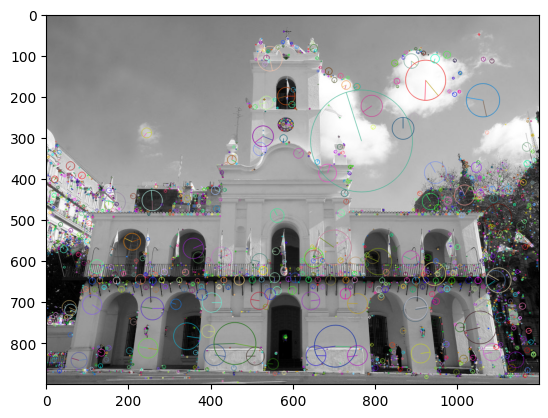

(<matplotlib.image.AxesImage at 0x21424ed0f48>, None)

In [20]:

detalle = True
if detalle:
    # Dibujamos las características encontradas con más detalle
    img=cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
else:
    # Dibujamos las características encontradas sin mucho detalle
    img=cv.drawKeypoints(gray, kp, img)
    
#cv.imshow('detecciones', img)
plt.imshow(img),plt.show()

#### 2. SURF - características

1379


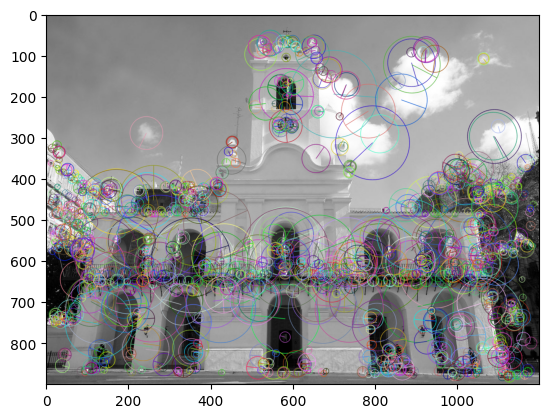

(<matplotlib.image.AxesImage at 0x21416adebc8>, None)

In [21]:
# Definimos el umbral para el Hessiano
hess_thresh = 1500

# Calculamos las características con ese umbral
surf = cv.xfeatures2d.SURF_create(hess_thresh)
kp, des = surf.detectAndCompute(gray, None)

# Verificamos cuántas características se encontraron
print(len(kp))

# Graficamos...
Detalle = True
if Detalle:
    # Dibujamos las características encontradas con más detalle
    img2=cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
else:
    # Dibujamos las características encontradas sin mucho detalle
    img2=cv.drawKeypoints(gray,kp,img)

#cv.imshow('SURF', img2)
plt.imshow(img2),plt.show()

#### 3. FAST - características

Umbral: 10
nonmaxSuppression:True
Vecindario: 2
Keypoints totales con nonmaxSuppression: 14533


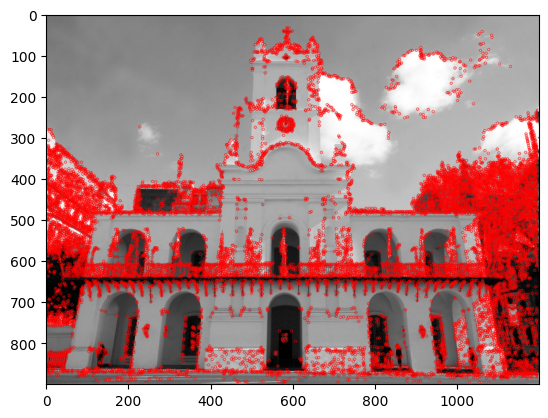

(<matplotlib.image.AxesImage at 0x21416e07388>, None)

In [22]:
# Iniciamos el objeto FAST con valores por defecto
fast = cv.FastFeatureDetector_create()

# Encontramos y dibujamos los puntos clave (keypoints)
kp = fast.detect(gray, None)

# Devolvemos los valores por defecto
print( "Umbral: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "Vecindario: {}".format(fast.getType()) )
print( "Keypoints totales con nonmaxSuppression: {}".format(len(kp)) )

# Graficamos
img2 = cv.drawKeypoints(gray, kp, None, color=(255,0,0))
#cv.imshow('FAST - NMS TRUE',img2)
plt.imshow(img2),plt.show()

Keypoints totales sin nonmaxSuppression: 49883


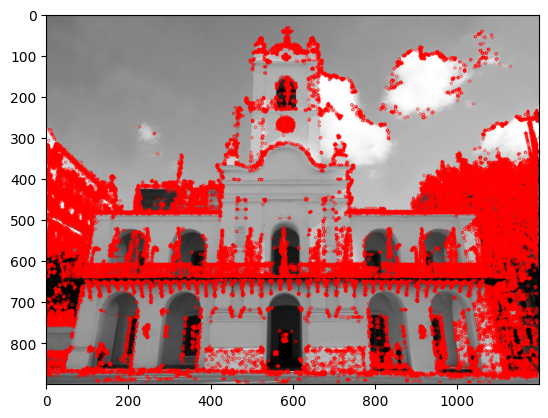

(<matplotlib.image.AxesImage at 0x21416ac0408>, None)

In [23]:
# Repetimos suprimiendo la no-supresión de máximos (nonmaxSuppression)
img = cv.imread('imagenes/cabildo.jpg', 0)
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Keypoints totales sin nonmaxSuppression: {}".format(len(kp)) )

# Graficamos
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
#cv.imshow('FAST - NMS FALSE', img3)
plt.imshow(img3),plt.show()

#### 4. ORB - características

![image info](./imagenes/orb_docu.png)

500


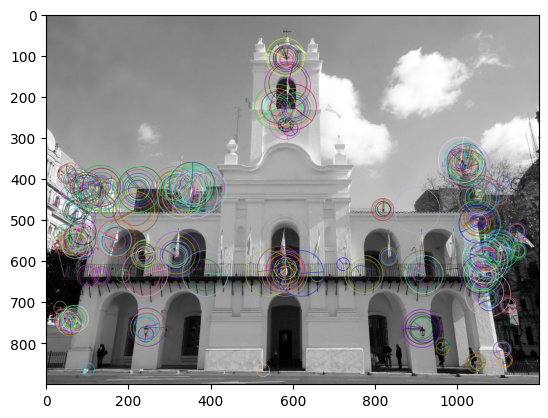

(<matplotlib.image.AxesImage at 0x21416d85fc8>, None)

In [24]:
gray = cv.imread('imagenes/cabildo.jpg', 0)

# Inicializamos el detector ORB
orb = cv.ORB_create()

# Encontramos los puntos clave (keypoints) - Es una versión de FAST
kp = orb.detect(gray, None)

# Calculamos los descriptores - Es una versión de BRIEF
kp, des = orb.compute(gray, kp)
# Verificamos cuántas características se encontraron
print(len(kp))

# Graficamos...
Detalle = True
if Detalle:
    # Dibujamos las características encontradas con más detalle
    img2=cv.drawKeypoints(gray,kp,img,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
else:
    # Dibujamos las características encontradas sin mucho detalle
    img2=cv.drawKeypoints(gray,kp,img)
    
#cv.imshow('ORB',img2)
plt.imshow(img2),plt.show()